# House Loan Data Analysis

In [ ]:
"""
My project utilized the dataset “house_loan_data.csv,” obtained from the MS: AI Deep Learning Specialization, using Python programming with 
Simplilearn. I have received permission to work on this dataset and to upload my Python code and results to my GitHub account. The goal of 
this work is to show my coding skills with results using the dataset related to the (House Loan Data Analysis) project.

"""

In [ ]:
"""
# Project Background:
• analyzing historical housing loan datasets.
• focusing on my project concentrates on anticipating whether a loan candidate will default on debt repayment. 
• Since loan datasets are remarkably skewed, the project adopts data preprocessing, balancing approaches.
• Using SMOTE to get balance datasets from the target variable.
• Making a deep learning model under TensorFlow and Keras to yield trustworthy predictions.

"""

In [ ]:
"""
# Objective:
• Do all operations associated with data preprocessing incorporating addressing null values, encoding categorical variables, and equalizing
  the original dataset with SMOTE.
• Explore and visualize the target (label) distribution to understand data asymmetry.
• Make a deep learning model which is used to forecast whether a financing applicant can pay loan or not using the housing loan historical data.
• Train the model.
• Examine the model with sensitivity.
• Target prediction performance via roc-auc.


"""

#  Perform data preprocessing and build a deep learning prediction model

In [ ]:
#  Artificial_Intelligence_Data Science_Deep_Learning_House_Loan_Data_Analysis_ Smote_Keras_Tensorflow

## Load the dataset 

In [4]:
# Load pandas library
import pandas as pd

# Load the dataset
df = pd.read_csv("loan_data.csv")

# Look at data structure
print (df.head(3))

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0       

In [6]:
# look at shape of the dataset (# rows, # columns)
print("shape of the dataset", df.shape)

shape of the dataset (307511, 122)


In [8]:
# summary the dataset insights
print("summary of the dataset:\n")
df.info()

summary of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
# find statistics (summary ) for each feature
print("summary statistics of the dataset:\n", df.describe(include = "all"))

summary statistics of the dataset:
            SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  30

## Check for null values in the dataset

In [16]:
# Find the number of missing (null0 values in each column (top 13)
missing_values = df.isna().sum().sort_values(ascending=False).head(13)   # See top 13 features

print("Num. of missing values in each column:\n", missing_values)


Num. of missing values in each column:
 COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
FLOORSMIN_AVG               208642
FLOORSMIN_MODE              208642
FLOORSMIN_MEDI              208642
dtype: int64


## Print the percentage of default to a payer of the dataset for the TARGET column

In [18]:
# check: is there "TARGET" column?
# total 122 columns

if "TARGET" not in df.columns:
    raise ValueError("I could not find the 'TARGET' column in the given dataset (df).")   # No error means "TARGET" is there. 

# TARGET: Whether the loan was repaid
# When " TARGET" = 1 (default), then loan was not repaid. 
# When " TARGET" = 0 (no default), then loan was repaid. 

# defaul % ? 
df_mean = df["TARGET"].mean()    # mean() represents a fraction of rows at "TARGET" = 1
print(f"mean data:, {df_mean:.3f}%")

print("\n")

percentage_default = df_mean*100
print(f"percentage default:, {percentage_default:.3f}%")

print("\n")

percentage_not_default = (1 - df_mean)*100
print(f"percentage not default:, {percentage_not_default:.3f}%")


mean data:, 0.081%


percentage default:, 8.073%


percentage not default:, 91.927%


In [21]:
# visualization the "TARGET" variable


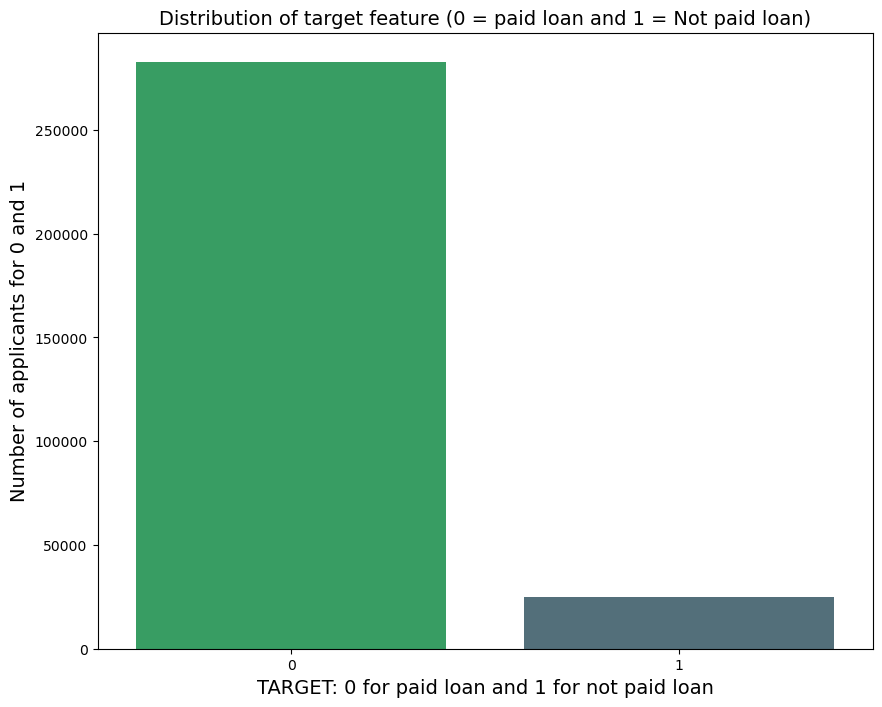

In [20]:
# know about the target feature

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.countplot(data = df, x = "TARGET", hue = "TARGET", palette = ["#27AE60", "#4C7280"], legend = False)
plt.title("Distribution of target feature (0 = paid loan and 1 = Not paid loan)", fontsize = 14)
plt.xlabel("TARGET: 0 for paid loan and 1 for not paid loan", fontsize = 14) 
plt.ylabel("Number of applicants for 0 and 1", fontsize = 14)
plt.show()

## Balance the dataset if the data is imbalanced

In [27]:
# before balancing the dataset (df) with SMOTE, we need to do some key steps. 

In [29]:
# SK_ID_CURR: Unique identifier for each client.

In [22]:
# Find features (X) and labels (y)

# is there "SK_ID_CURR" column?
if "SK_ID_CURR" in df.columns:
    two_columns = ["TARGET", "SK_ID_CURR"]
    X = df.drop(columns = two_columns)
else:
    drop_target_only = ["TARGET"]   # drop this column only if there is no "SK_ID_CURR" column. 
    X = df.drop(columns = drop_target_only)

print("shape of the dataset(X):",X.shape )           # ["TARGET", "SK_ID_CURR"] are dropped.    

# find the target variable which we want to predict later.
y = df["TARGET"] 

shape of the dataset(X): (307511, 120)


In [26]:
# drop any spaces in the columns names
X.columns = [i.strip() for i in X.columns]
#print(X.columns.tolist())

In [35]:
# work on column types

In [34]:
# find a list of numeric columns
import numpy as np
numeric_columns = X.select_dtypes(include =[np.number]).columns.tolist()

print("a list of numeric columns:\n", numeric_columns)

print(";\n")

print(" number of numeric columns:", len(numeric_columns))


a list of numeric columns:
 ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', '

In [32]:
# try to find a list of categorical columns
categorical_columns = X.select_dtypes(include =["category", "object"]).columns.tolist()
print("a list of categorical columns:\n", categorical_columns)

print("\n")

print(" number of categorical  columns:\n", len(categorical_columns))

a list of categorical columns:
 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


 number of categorical  columns:
 16


In [36]:
# load OneHotEncoder  to encoder the categorical features
from sklearn.preprocessing import OneHotEncoder

# do data cleaning for making numeric pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline used to make a workflow 
from sklearn.pipeline import Pipeline

# "SimpleImputer" used to fill missing values
from sklearn.impute import SimpleImputer

# join categorical_features_pipeline  with  numerical_features_pipeline using ColumnTransformer
from sklearn.compose import ColumnTransformer


In [40]:
# use scikit-learn (edition = 1.7.2)
onehot_encoder = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)

In [42]:
# Make a preprocessing pipeline for the categorical features

categorical_features_pipeline = Pipeline([("ssimple_imputer", SimpleImputer(strategy = "most_frequent")), ("onehot_encoder", onehot_encoder)])


In [44]:
# Make a preprocessing pipeline for the numerical features
numerical_features_pipeline = Pipeline([("simple_imputer", SimpleImputer(strategy = "median")), ("standard_scaler", StandardScaler())])

In [46]:
# join the above 2 pipelines

numeric_categ_pipeline = ColumnTransformer( transformers = [ ("category", categorical_features_pipeline, categorical_columns), 
                                                            ("numerical",  numerical_features_pipeline, numeric_columns )], remainder = "drop")


In [48]:
# Use train test split to split data (X, and y )
from sklearn.model_selection import train_test_split

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)


In [50]:
print("X train (original) shape:", X_train_original.shape, "X test (original) shape:", X_test_original.shape)

X train (original) shape: (230633, 120) X test (original) shape: (76878, 120)


In [55]:
# data transformation

In [52]:
# use fit_transform() for the X train original data
X_train_original_transform  = numeric_categ_pipeline.fit_transform(X_train_original)

# test data transformation
# use transform() for the X test original data
X_test_original_transform  = numeric_categ_pipeline.transform(X_test_original)


print("X train (original) transform shape:", X_train_original_transform .shape, "X test (original) transform shape:", X_test_original_transform .shape)

X train (original) transform shape: (230633, 244) X test (original) transform shape: (76878, 244)


## Balance the dataset if the data is imbalanced

In [54]:
# Use SMOTE function to balance the training dataset

# see the the original y train dataset 

print("without using SMOTE, the original y train datasset:\n", pd.Series(y_train_original).value_counts())

without using SMOTE, the original y train datasset:
 TARGET
0    212014
1     18619
Name: count, dtype: int64


In [56]:
# use SMOTE to balance the original training dataset
from imblearn.over_sampling import SMOTE

random_state = 42

smote = SMOTE(random_state = random_state )

# use smote and fit_transform to the training dataset ( X_train_original_transform, and  y_train_original)

X_train_original_transform_smote,  y_train_original_smote = smote. fit_resample(X_train_original_transform, y_train_original)

# check if you see the balanced data (y_train_original_smote )

print("using SMOTE, the balanced data (y_train_original_smote ):\n", pd.Series( y_train_original_smote).value_counts())

print(";\n")

print("shape of X_train_original_transform_smote:\n", X_train_original_transform_smote.shape)   # Number. of rows and columns

using SMOTE, the balanced data (y_train_original_smote ):
 TARGET
0    212014
1    212014
Name: count, dtype: int64
;

shape of X_train_original_transform_smote:
 (424028, 244)


## make a deep learning model

In [59]:
# look at the number of features


print("shape of X_train_original_transform_smote:\n", X_train_original_transform_smote.shape) 

print(":\n")

first_input_layer =  X_train_original_transform_smote.shape[1]
print(" first input layer to model:\n",  first_input_layer)

shape of X_train_original_transform_smote:
 (424028, 244)
:

 first input layer to model:
 244


In [63]:
# make a deep learning model
from tensorflow import keras
from tensorflow.keras import layers

deep_learning_model = keras.Sequential([
    layers.Input(shape = (first_input_layer,)),
    layers.Dense(256, activation = "relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.2),
    layers.Dense(64, activation = "relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation = "sigmoid")
])
     

In [65]:
# compile this model 
deep_learning_model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.004),
    loss = "binary_crossentropy",
    metrics = [ keras.metrics.Recall(name = "sensitivity"), keras.metrics.AUC(name = "auc")])

In [67]:
deep_learning_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │        62,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,937 (406.00 KB)

 Trainable params: 103,937 (406.00 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# fit deep learning model with evaluation tracking

# use EarlyStopping when monitor = "val_loss" does not show the pgrogress in fitting
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping( monitor = "val_loss", patience = 10, restore_best_weights = True)


In [73]:
# fit the model
fit_model = deep_learning_model.fit(X_train_original_transform_smote, y_train_original_smote, validation_split = 0.25, epochs = 60, batch_size = 150,
callbacks = [early_stopping], verbose = 2)

Epoch 1/60
2121/2121 - 9s - 4ms/step - auc: 0.7989 - loss: 0.5072 - sensitivity: 0.4949 - val_auc: 0.0000e+00 - val_loss: 0.6191 - val_sensitivity: 0.6127
Epoch 2/60
2121/2121 - 10s - 5ms/step - auc: 0.8588 - loss: 0.4349 - sensitivity: 0.6036 - val_auc: 0.0000e+00 - val_loss: 0.5331 - val_sensitivity: 0.7070
Epoch 3/60
2121/2121 - 7s - 4ms/step - auc: 0.8864 - loss: 0.3922 - sensitivity: 0.6551 - val_auc: 0.0000e+00 - val_loss: 0.5331 - val_sensitivity: 0.7105
Epoch 4/60
2121/2121 - 7s - 3ms/step - auc: 0.9026 - loss: 0.3633 - sensitivity: 0.6788 - val_auc: 0.0000e+00 - val_loss: 0.4303 - val_sensitivity: 0.7813
Epoch 5/60
2121/2121 - 7s - 3ms/step - auc: 0.9132 - loss: 0.3427 - sensitivity: 0.7021 - val_auc: 0.0000e+00 - val_loss: 0.3449 - val_sensitivity: 0.8223
Epoch 6/60
2121/2121 - 6s - 3ms/step - auc: 0.9201 - loss: 0.3288 - sensitivity: 0.7149 - val_auc: 0.0000e+00 - val_loss: 0.3360 - val_sensitivity: 0.8252
Epoch 7/60
2121/2121 - 7s - 4ms/step - auc: 0.9264 - loss: 0.3159 - s

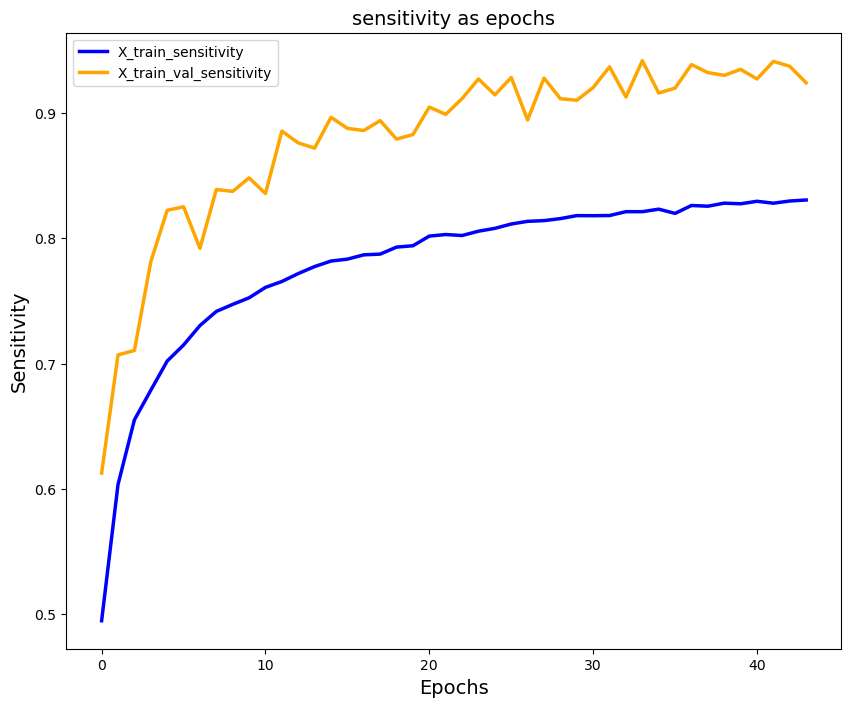

In [75]:
# plot fit model history (training sensitivity as a function of epochs, and val_sensitivity as epochs)

plt.figure(figsize = (10, 8))

fit_model_history = fit_model.history

#print(fit_model_history)
plt.plot(fit_model_history["sensitivity"], label = "X_train_sensitivity",  linewidth = 2.5,  color = "blue")

plt.plot(fit_model_history["val_sensitivity"], label = "X_train_val_sensitivity",  linewidth = 2.5,  color = "orange")

plt.title("sensitivity as epochs", fontsize = 14)
plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Sensitivity", fontsize = 14)
plt.legend()
plt.show()


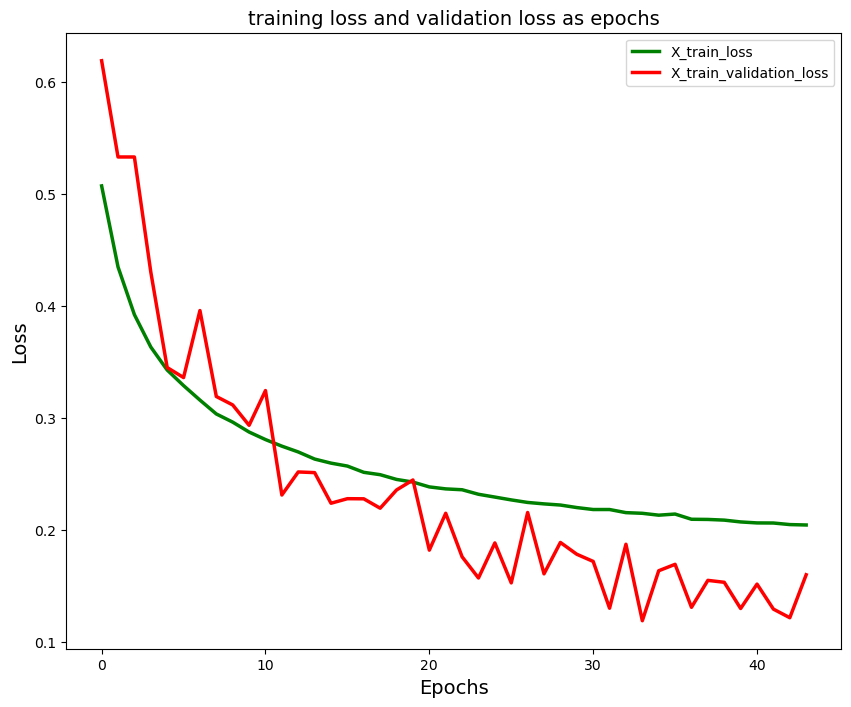

In [79]:
# plot fit model history (training loss as a function of epochs, and validation loss as epochs)

plt.figure(figsize = (10, 8))

plt.plot(fit_model_history["loss"], label = "X_train_loss",  linewidth = 2.5,  color = "green")

plt.plot(fit_model_history["val_loss"], label = "X_train_validation_loss",  linewidth = 2.5,  color = "red")
plt.title("training loss and validation loss as epochs", fontsize = 14)
plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Loss", fontsize = 14)
plt.legend()
plt.show()

## Evaluate the model

In [81]:
# Use the test dataset to evaluate the model

# check the data type
print("data type of y_test_original:", y_test_original.dtypes)
print("\n")

y_prediction_probability_test = deep_learning_model.predict(X_test_original_transform).ravel()

# roc curve
from sklearn.metrics import roc_auc_score
roc_auc_score_test = roc_auc_score(y_test_original, y_prediction_probability_test)
print(f"roc_auc_score_test: {roc_auc_score_test:.3f}")


data type of y_test_original: int64


2403/2403 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step
roc_auc_score_test: 0.676


In [89]:
# change probability to either 1 or 0

y_probabilities_TF = (y_prediction_probability_test >= 0.5) 
#print(y_probabilities_TF)
print("\n")
y_probabilities_binary = y_probabilities_TF.astype(int)  
print(y_probabilities_binary)
print("\n")
# find a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matr = confusion_matrix(y_test_original, y_probabilities_binary)
print("confusion matrix(:\n", conf_matr)
print("\n")
# find sensitivity in the test dataset
from sklearn.metrics import recall_score
sensitivity_test = recall_score( y_test_original, y_probabilities_binary)
print(f"recall sensitivity on the test dataset: {sensitivity_test:.3f}")




[1 0 0 ... 0 0 0]


confusion matrix(:
 [[67291  3381]
 [ 5326   880]]


recall sensitivity on the test dataset: 0.142


In [91]:
# get classification resultss
from sklearn.metrics import classification_report
print(" classification report:\n", classification_report(y_test_original, y_probabilities_binary, digits = 2))

 classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     70672
           1       0.21      0.14      0.17      6206

    accuracy                           0.89     76878
   macro avg       0.57      0.55      0.55     76878
weighted avg       0.87      0.89      0.88     76878



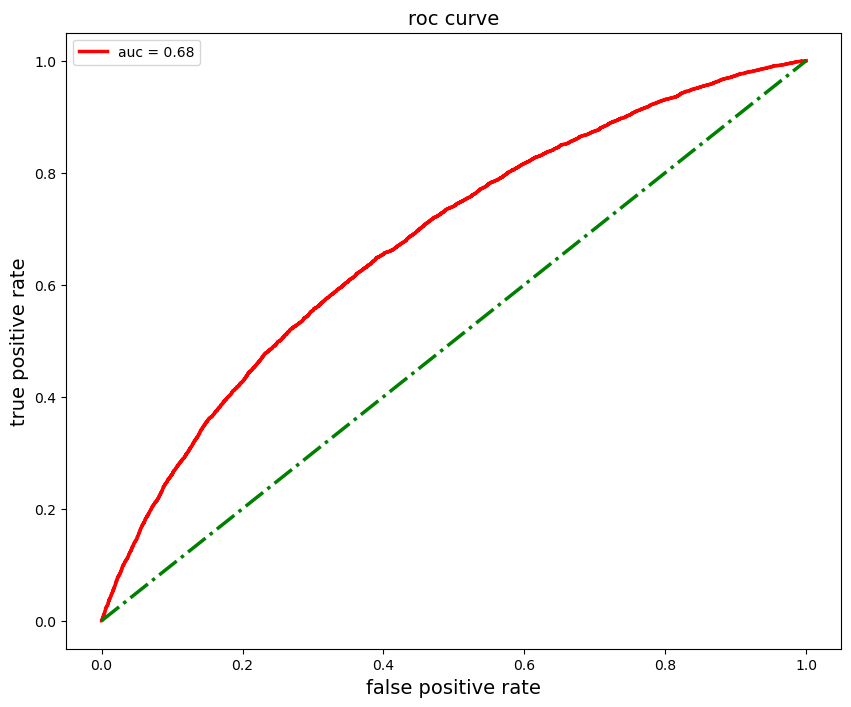

In [93]:
# roc curve
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, _ = roc_curve(y_test_original, y_prediction_probability_test)

plt.figure(figsize = (10, 8))

a = [0, 1]

b = [0, 1]


plt.plot(false_positive_rate, true_positive_rate, label = f"auc = {roc_auc_score_test:.2f}", color = "red", linewidth = 2.5)
plt.plot(a, b, "green", linestyle = "-.", linewidth = 2.5)
plt.title("roc curve", fontsize = 14)
plt.xlabel("false positive rate", fontsize = 14 )
plt.ylabel("true positive rate", fontsize = 14 )
plt.legend()
plt.show()

In [ ]:
"""
# Conclusion:
• Proficiently created an end to end project pipeline to predict loan default under the finance discipline.
• Addressed category imbalance with applying SMOTE 
• Prepared the housing loan dataset with appropriate encoding for model training.
• Secured a reasonable ROC-AUC score with the deep learning model used to classify loan borrowers at high risk and reliable borrowers.
• Emphasized the model’s efficiency using sensitivity results to find emerging defaults, which is crucial for managing loan risk.
• Due to uneven class distribution, accuracy was diminished, but the model delivers a clear framework for future improvements. 
• Further refinement can be accomplished through model parameter adjustment, integrated models with cutting age feature selection approaches.

"""